In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_df = pd.read_csv("../../resources/tic_tac_results.csv")
results_df.head()

,MOVE1,MOVE2,MOVE3,MOVE4,MOVE5,MOVE6,MOVE7,CLASS
0,0,8,1,3,?,?,?,loss
1,4,7,2,6,?,?,?,win
2,0,8,1,6,5,?,?,draw
3,4,7,2,3,?,?,?,draw
4,0,4,2,1,?,?,?,win


In [3]:
results_df.dtypes

MOVE1     int64
MOVE2    object
MOVE3    object
MOVE4    object
MOVE5    object
MOVE6    object
MOVE7    object
CLASS    object
dtype: object

In [4]:
results_df = results_df.astype("category")
results_df.dtypes

MOVE1    category
MOVE2    category
MOVE3    category
MOVE4    category
MOVE5    category
MOVE6    category
MOVE7    category
CLASS    category
dtype: object

### Balanceamento da response

<Axes: ylabel='CLASS'>

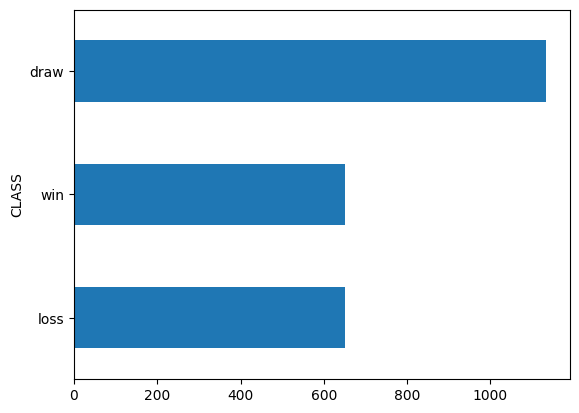

In [5]:
results_df.CLASS.value_counts(ascending=True).plot(kind="barh")

### Posições mais jogadas por MOVE

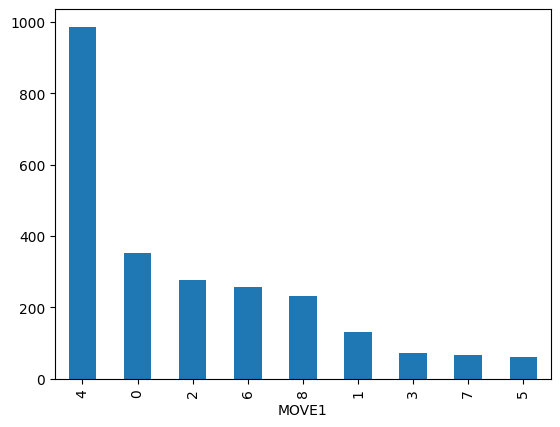

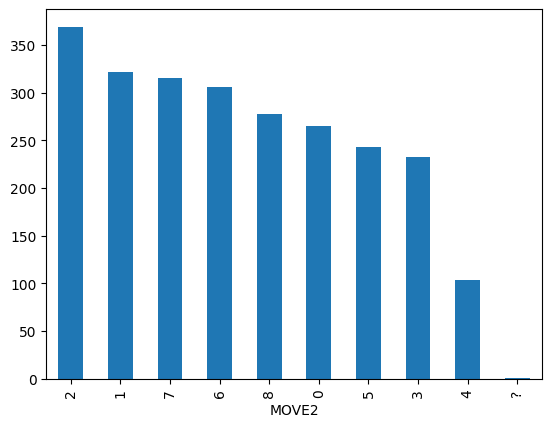

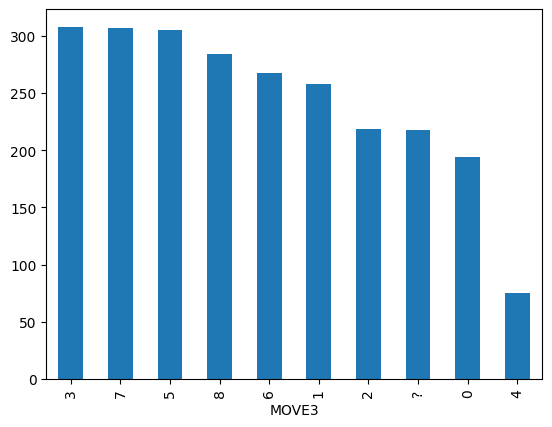

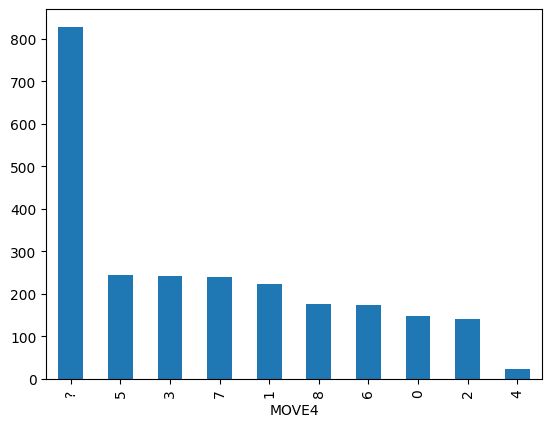

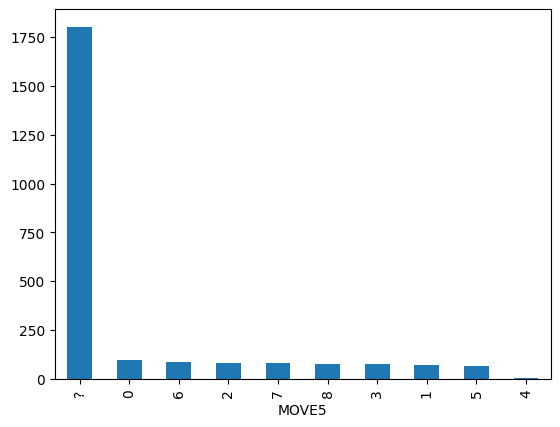

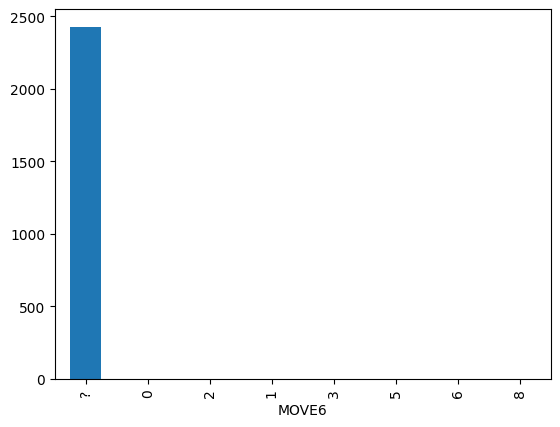

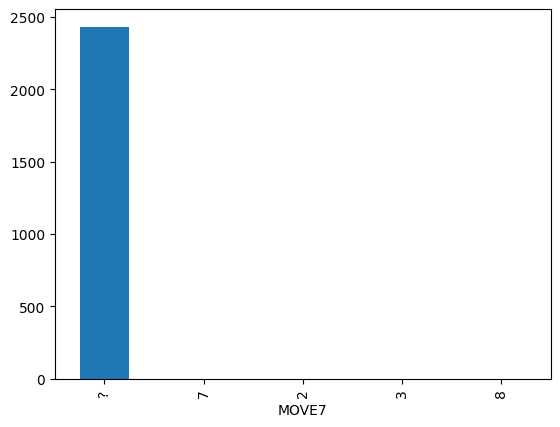

In [6]:
for column in results_df.columns.drop("CLASS"):
    results_df[column].value_counts(ascending=False).plot(kind="bar")
    plt.show()

### Taxa de vitória por posição em cada MOVE

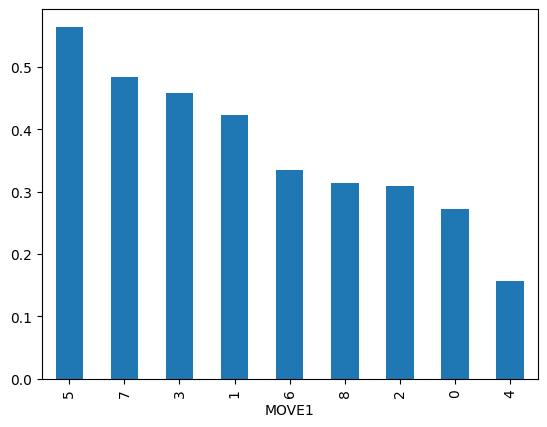

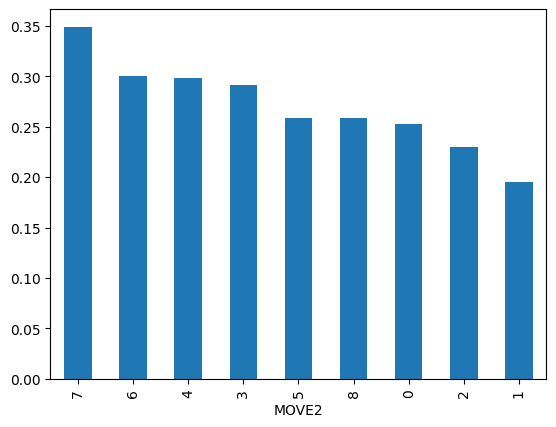

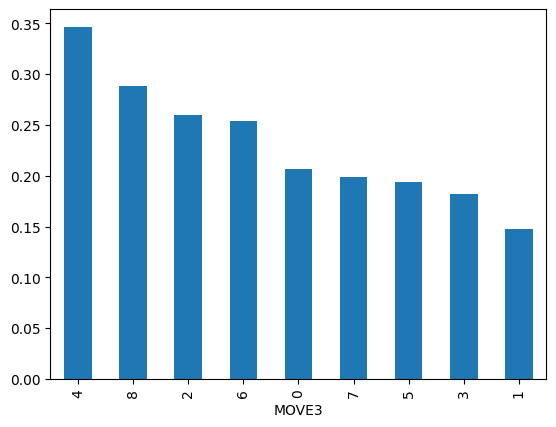

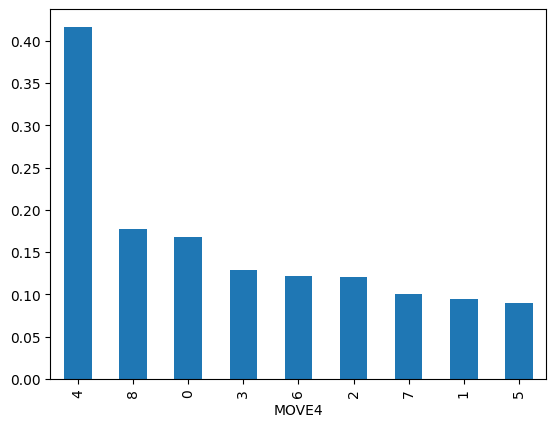

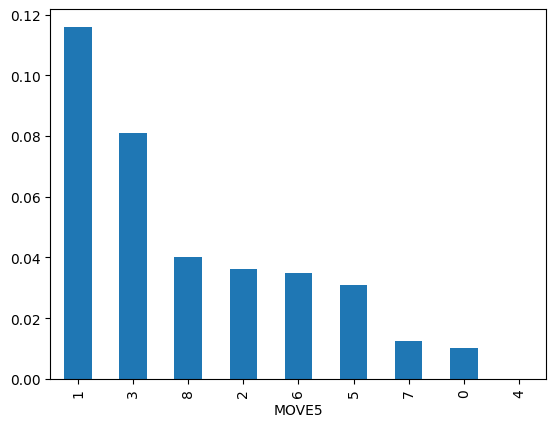

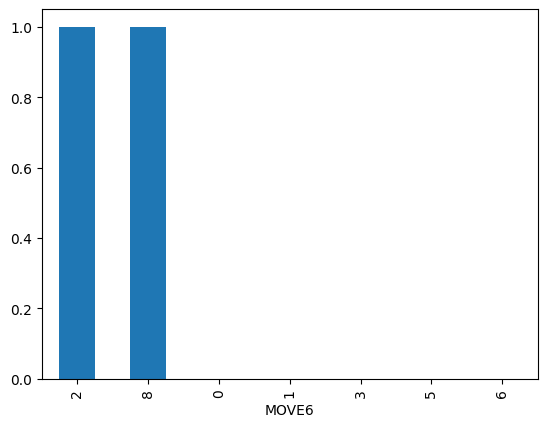

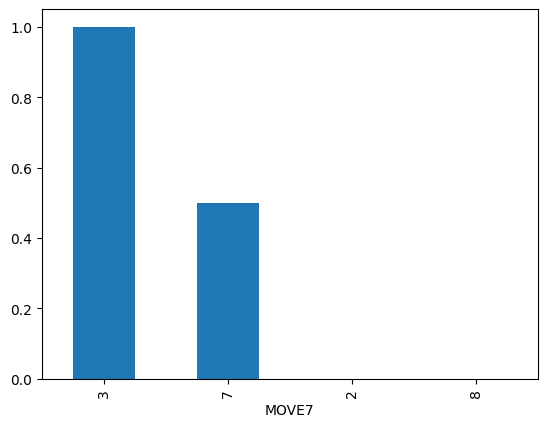

In [7]:
for column in results_df.columns.drop("CLASS"):
    win_rate_per_move = results_df.groupby(column, observed=True)["CLASS"].apply(lambda x: (x == "win").sum() / len(x))
    if "?" in win_rate_per_move.index:
        win_rate_per_move = win_rate_per_move.drop(labels=["?"])
    win_rate_per_move.sort_values(ascending=False).plot(kind="bar")
    
    plt.show()